### 3. Data Aquisition

#### B. Satelite Data

This data was acquired from the following [source](https://firms.modaps.eosdis.nasa.gov/download).

The Data Dictionary Can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl#ed-firms-attributes).

It contemplates all events from 2001 to the end of 2019 in NSW only.

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box, Point, LineString, Polygon

%matplotlib inline

In [2]:
sat = gpd.read_file('./data/fire/fire_archive_M6_128693.shp')
sat.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry
0,-30.3560,151.7422,316.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,69,6.2,295.7,9.0,D,0,POINT (151.74220 -30.35600)
1,-30.7754,151.1438,342.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,294.2,42.9,D,0,POINT (151.14380 -30.77540)
2,-30.5773,151.2968,313.0,1.0,1.0,2000-11-01,0019,Terra,MODIS,52,6.2,294.5,6.1,D,0,POINT (151.29680 -30.57730)
3,-30.5863,151.2951,325.7,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,293.9,18.1,D,0,POINT (151.29510 -30.58630)
4,-31.5540,147.0632,318.9,1.3,1.1,2000-11-01,0020,Terra,MODIS,73,6.2,296.2,12.6,D,0,POINT (147.06320 -31.55400)


In [3]:
sat.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 497267 entries, 0 to 497266
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   LATITUDE    497267 non-null  float64 
 1   LONGITUDE   497267 non-null  float64 
 2   BRIGHTNESS  497267 non-null  float64 
 3   SCAN        497267 non-null  float64 
 4   TRACK       497267 non-null  float64 
 5   ACQ_DATE    497267 non-null  object  
 6   ACQ_TIME    497267 non-null  object  
 7   SATELLITE   497267 non-null  object  
 8   INSTRUMENT  497267 non-null  object  
 9   CONFIDENCE  497267 non-null  int64   
 10  VERSION     497267 non-null  object  
 11  BRIGHT_T31  497267 non-null  float64 
 12  FRP         497267 non-null  float64 
 13  DAYNIGHT    497267 non-null  object  
 14  TYPE        497267 non-null  int64   
 15  geometry    497267 non-null  geometry
dtypes: float64(7), geometry(1), int64(2), object(6)
memory usage: 60.7+ MB


In [4]:
sat.describe()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,CONFIDENCE,BRIGHT_T31,FRP,TYPE
count,497267.000000,497267.000000,497267.000000,497267.000000,497267.000000,497267.000000,497267.000000,497267.000000,497267.000000
mean,-33.254476,148.331573,326.499116,1.582492,1.202986,69.451731,296.993802,61.001572,0.028574
std,3.083324,3.177342,23.674483,0.784059,0.240991,22.844282,10.085875,170.266038,0.239381
min,-38.000000,140.000600,300.000000,1.000000,1.000000,0.000000,265.700000,0.000000,0.000000
25%,-36.091800,146.601300,310.900000,1.100000,1.000000,55.000000,290.400000,11.900000,0.000000
50%,-33.597600,148.521800,320.800000,1.300000,1.100000,71.000000,295.900000,23.100000,0.000000
75%,-30.271450,150.863400,334.400000,1.800000,1.300000,87.000000,302.500000,51.000000,0.000000
max,-28.000000,153.591900,506.700000,4.800000,2.000000,100.000000,400.100000,7969.000000,3.000000


### Checking basic points

1. <a href='#Restrict_events'>Restrict events to NSW only</a>
2. <a href='#Restrict_dates'>Restrict event dates between 01/11/2017 to 25/06/2017</a>
3. <a href='#Cleaning'>Cleaning data</a>


<a id='Restrict_events'></a>

#### Restrict events to NSW only
Given the size the dataset it will be best to restrict all entries to encompass what we need.

Let's ensure we only use the entries in NSW.

In [5]:
# Changing the column names to lowercase
sat.columns = [columns.lower() for columns in sat.columns]

In [6]:
# loading in the state poligon
nsw = gpd.read_file('./data/map/NSW/state/NSW_STATE_POLYGON_shp.shp')
nsw

,ST_PLY_PID,DT_CREATE,DT_RETIRE,STATE_PID,NSW_STATE_,NSW_STAT_1,NSW_STAT_2,NSW_STAT_3,geometry
0,12384,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((150.07240 -36.46528, 150.07238 -36.4..."
1,12385,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((152.56741 -32.22442, 152.56759 -32.2..."
2,12386,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((153.08446 -30.89781, 153.08453 -30.8..."
3,12387,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((150.14784 -36.23360, 150.14786 -36.2..."
4,12388,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((150.07268 -36.46063, 150.07272 -36.4..."
...,...,...,...,...,...,...,...,...,...
314,12620,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((152.54456 -32.34899, 152.54471 -32.3..."
315,12621,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((153.15369 -30.24243, 153.15371 -30.2..."
316,12622,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((150.14291 -36.27146, 150.14295 -36.2..."
317,12623,2006-01-12,None,1,2006-01-12,None,NEW SOUTH WALES,NSW,"POLYGON ((152.14634 -32.76551, 152.14644 -32.7..."


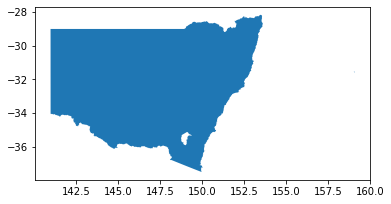

In [15]:
nsw.plot()

In [7]:
# For some reason the 'isin' metohd is not working. Will have to use a spatial join
# %%time
joined_inner = gpd.sjoin(sat, nsw, op='within', how='inner')

sat_nsw = joined_inner[['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type', 'geometry']]
sat_nsw.head()

C:\Users\julio\anaconda3\envs\geo_env\lib\site-packages\geopandas\tools\sjoin.py:58: UserWarning: CRS of frames being joined does not match!(epsg:4326 != epsg:4283)
  warn(


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry
0,-30.3560,151.7422,316.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,69,6.2,295.7,9.0,D,0,POINT (151.74220 -30.35600)
1,-30.7754,151.1438,342.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,294.2,42.9,D,0,POINT (151.14380 -30.77540)
2,-30.5773,151.2968,313.0,1.0,1.0,2000-11-01,0019,Terra,MODIS,52,6.2,294.5,6.1,D,0,POINT (151.29680 -30.57730)
3,-30.5863,151.2951,325.7,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,293.9,18.1,D,0,POINT (151.29510 -30.58630)
4,-31.5540,147.0632,318.9,1.3,1.1,2000-11-01,0020,Terra,MODIS,73,6.2,296.2,12.6,D,0,POINT (147.06320 -31.55400)


In [8]:
sat_nsw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 324595 entries, 0 to 193180
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   latitude    324595 non-null  float64 
 1   longitude   324595 non-null  float64 
 2   brightness  324595 non-null  float64 
 3   scan        324595 non-null  float64 
 4   track       324595 non-null  float64 
 5   acq_date    324595 non-null  object  
 6   acq_time    324595 non-null  object  
 7   satellite   324595 non-null  object  
 8   instrument  324595 non-null  object  
 9   confidence  324595 non-null  int64   
 10  version     324595 non-null  object  
 11  bright_t31  324595 non-null  float64 
 12  frp         324595 non-null  float64 
 13  daynight    324595 non-null  object  
 14  type        324595 non-null  int64   
 15  geometry    324595 non-null  geometry
dtypes: float64(7), geometry(1), int64(2), object(6)
memory usage: 42.1+ MB


The amount of entries diminished. Let's check if they all are within the NSW limits.

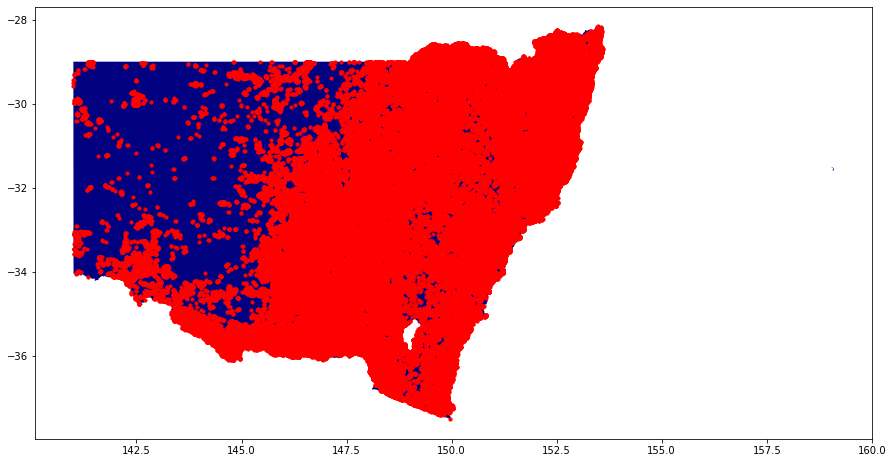

In [9]:
# Creating figure to plot
fig, ax = plt.subplots(figsize=(15,15))
# Plot the country borders
nsw.plot(ax=ax, color='navy')
# Plot the individual points
sat_nsw['geometry'].plot(ax=ax, color='red',  markersize=10)


<a id='Restrict_dates'></a>

#### 2. Restrict event dates between 01/11/2007 to 25/06/2017
We only have  this interval in time for the weather data, unfortunatelly.

Only events within this time frame should  be looked at.

In [10]:
# reading acq_date as date
sat_nsw['date'] = pd.to_datetime(sat_nsw['acq_date'])

<ipython-input-10-bd5fa6bc326d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_nsw['date'] = pd.to_datetime(sat_nsw['acq_date'])


In [11]:
sat_nsw.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,geometry,date
0,-30.3560,151.7422,316.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,69,6.2,295.7,9.0,D,0,POINT (151.74220 -30.35600),2000-11-01
1,-30.7754,151.1438,342.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,294.2,42.9,D,0,POINT (151.14380 -30.77540),2000-11-01
2,-30.5773,151.2968,313.0,1.0,1.0,2000-11-01,0019,Terra,MODIS,52,6.2,294.5,6.1,D,0,POINT (151.29680 -30.57730),2000-11-01
3,-30.5863,151.2951,325.7,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,293.9,18.1,D,0,POINT (151.29510 -30.58630),2000-11-01
4,-31.5540,147.0632,318.9,1.3,1.1,2000-11-01,0020,Terra,MODIS,73,6.2,296.2,12.6,D,0,POINT (147.06320 -31.55400),2000-11-01


In [12]:
sat_bin = sat_nsw[(sat_nsw['date'] >= '2007/11/01') & (sat_nsw['date'] <= '2017/06/25') ]

In [14]:
# Checking max date
sat_bin.date.max()

Timestamp('2017-06-25 00:00:00')

In [15]:
# Checking min date
sat_bin.date.min()

Timestamp('2007-11-01 00:00:00')

In [16]:
sat_bin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 111067 entries, 186016 to 193180
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   latitude    111067 non-null  float64       
 1   longitude   111067 non-null  float64       
 2   brightness  111067 non-null  float64       
 3   scan        111067 non-null  float64       
 4   track       111067 non-null  float64       
 5   acq_date    111067 non-null  object        
 6   acq_time    111067 non-null  object        
 7   satellite   111067 non-null  object        
 8   instrument  111067 non-null  object        
 9   confidence  111067 non-null  int64         
 10  version     111067 non-null  object        
 11  bright_t31  111067 non-null  float64       
 12  frp         111067 non-null  float64       
 13  daynight    111067 non-null  object        
 14  type        111067 non-null  int64         
 15  geometry    111067 non-null  geometry 

The DS reduced in size significantly. That may be because there is a large amount of entries in 2019.

Let's do a bit of cleaning too.

<a id='Cleaning'></a>

#### 3. Cleaning data
Cleaning and preparing it for further analysis

In [17]:
# Binaryzing daynight column
sat_bin['daynight'] = sat_bin['daynight'].apply(lambda x: 1 if x== 'D' else 0)

<ipython-input-17-4461feb66ec7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_bin['daynight'] = sat_bin['daynight'].apply(lambda x: 1 if x== 'D' else 0)


In [18]:
# Keeping only bushfires from the dataset.
sat_bin = sat_bin.drop(list(sat_bin.loc[(sat_bin['type'] == 2 ) | (sat_bin['type'] == 3 )].index))

In [19]:
sat_bin['daynight'].value_counts()

1    95359
0    13010
Name: daynight, dtype: int64

In [20]:
# Dropping date colum, shapely files do not like it, and then saving to file
sat_bin.drop('date', axis=1).to_file('./data/processed/satelite/clean_satelite.shp')